In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/home/sasidharreddy/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sasidharreddy/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df1 = pd.read_csv('/home/sasidharreddy/stuff/OELP_sem6/additional_features/data.csv')
df=df1.iloc[:, :4]
df=df
df.to_csv('new_output_file.csv', index=False)
df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))
df = df.drop(['idates', 'imonths', 'iyears'], axis=1)
df.to_csv('output_file.csv', index=False)

df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,obs
datetime,
2007-01-06,0.0
2007-01-07,0.0
2007-01-08,0.0
2007-01-09,0.0
2007-01-10,0.0


<AxesSubplot:xlabel='datetime'>

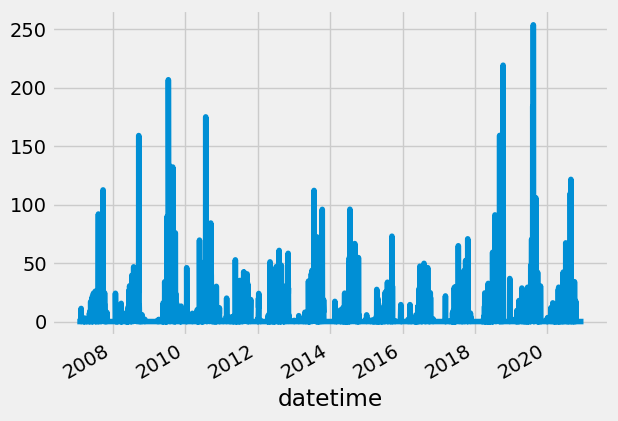

In [4]:
obs=df['obs']
obs.plot()

In [5]:
len(df)

4998

In [6]:
train = df.iloc[:3000]
test = df.iloc[3000:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df.head(),df.tail()

(            obs
 datetime       
 2007-01-06  0.0
 2007-01-07  0.0
 2007-01-08  0.0
 2007-01-09  0.0
 2007-01-10  0.0,
             obs
 datetime       
 2020-12-27  0.0
 2020-12-28  0.0
 2020-12-29  0.0
 2020-12-30  0.0
 2020-12-31  0.0)

In [13]:
# scaler.fit(train)
scaled_train = train
scaled_test = test

In [14]:
scaled_train[:10]

,obs
datetime,
2007-01-06,0.0
2007-01-07,0.0
2007-01-08,0.0
2007-01-09,0.0
2007-01-10,0.0
2007-01-11,0.0
2007-01-12,0.0
2007-01-13,0.0
2007-01-14,0.0


In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 365
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

2024-05-13 16:10:10.660250: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 16:10:10.664929: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 16:10:10.723354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 16:10:10.723401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 16:10:10.724903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [12]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.42343387e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.31399845e-03
 0.000

In [145]:
X.shape

(1, 365, 1)

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [147]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [148]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
model.fit(generator,epochs=1)

2635/2635 [==============================] - 182s 69ms/step - loss: 0.0034


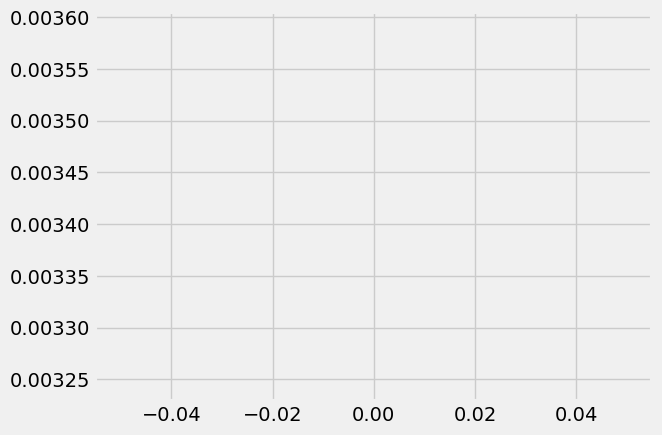

In [150]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [151]:
last_train_batch = scaled_train[-365:]

In [152]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [153]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 224ms/step


array([[0.01643461]], dtype=float32)

In [154]:
scaled_test[0]

array([0.0549594])

In [155]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 39ms/step


In [156]:
test_predictions

[array([0.01643461], dtype=float32),
 array([0.01554697], dtype=float32),
 array([0.01492144], dtype=float32),
 array([0.01446943], dtype=float32),
 array([0.01414101], dtype=float32),
 array([0.01390121], dtype=float32),
 array([0.01372532], dtype=float32),
 array([0.01359579], dtype=float32),
 array([0.01350007], dtype=float32),
 array([0.01342911], dtype=float32),
 array([0.01337638], dtype=float32),
 array([0.0133371], dtype=float32),
 array([0.01330778], dtype=float32),
 array([0.01328587], dtype=float32),
 array([0.01326947], dtype=float32),
 array([0.01325718], dtype=float32),
 array([0.01324796], dtype=float32),
 array([0.01324105], dtype=float32),
 array([0.01323586], dtype=float32),
 array([0.01323195], dtype=float32),
 array([0.01322902], dtype=float32),
 array([0.01322682], dtype=float32),
 array([0.01322516], dtype=float32),
 array([0.01322392], dtype=float32),
 array([0.01322298], dtype=float32),
 array([0.01322228], dtype=float32),
 array([0.01322175], dtype=float32),
 a

In [157]:
print(len(test_predictions),len(test))

1998 1998


In [158]:
true_predictions = scaler.inverse_transform(test_predictions)

In [159]:
test['prediction']=true_predictions

/tmp/ipykernel_205766/2288823151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=true_predictions


In [160]:
test.head()

,obs,prediction
datetime,,
2015-06-22,11.37,3.399992
2015-06-23,2.01,3.216358
2015-06-24,0.00,3.086947
2015-06-25,0.00,2.993435
2015-06-26,0.14,2.925493


In [161]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['obs'],test['prediction']))
print(rmse)

14.033245674569208


<AxesSubplot:xlabel='datetime'>

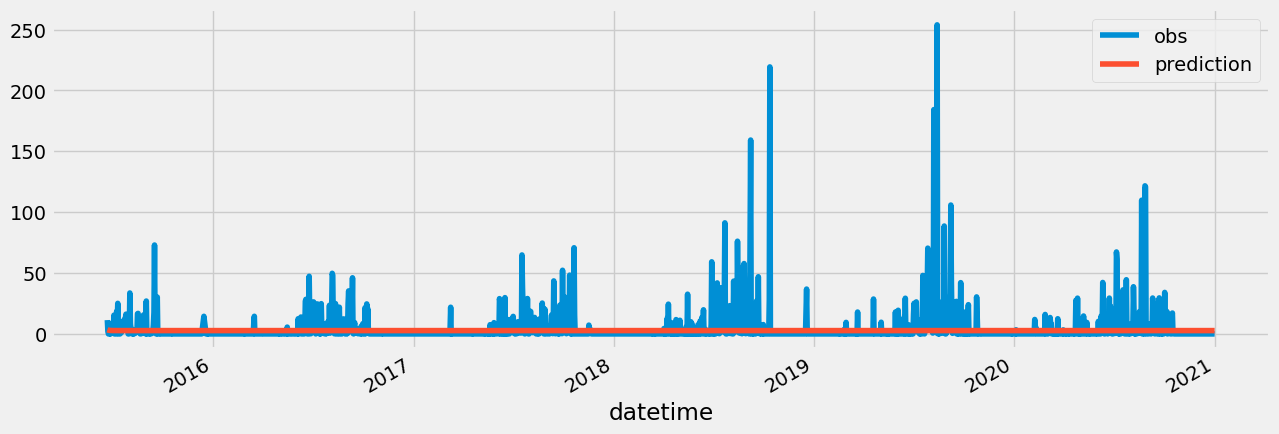

In [162]:
test.plot(figsize=(14,5))